Convolutional neural networks (CNNs) are a powerful type of artificial neural networks that can learn to recognize complex patterns in images. However, designing and training CNNs is not a trivial task, as there are many factors that influence their performance, such as the number and size of filters, the number and type of layers, the activation functions, the regularization methods, and so on. One of the most important factors is the depth of the network, which refers to how many layers of filters are stacked on top of each other. Intuitively, deeper networks should be able to learn more abstract and high-level features from the images, but they also pose more challenges in terms of computational cost, memory usage, and optimization difficulty. In this notebook, I will review and implement the structure proposed in a seminal paper by Simonyan and Zisserman from 2014 that explored the effect of network depth on large-scale image recognition using very deep CNNs with very small filters. I will also discuss some of their key findings and contributions to the field of computer vision.

Their main contribution is a thorough evaluation of networks of increasing depth using an architecture with very small (3x3) convolution filters, which shows that a significant improvement on the prior-art configurations can be achieved by pushing the depth to 16-19 weight layers. These findings were the basis of our ImageNet Challenge 2014 submission, where their team secured the first and the second places in the localisation and classification tracks respectively. 

## Key points:
 - The paper investigates how the depth of convolutional neural networks (CNNs) affects their accuracy in large-scale image recognition tasks. 
 - It was demonstrated that the representation depth is beneficial for the classification accuracy, and that state-of-the-art performance on the ImageNet challenge dataset can be achieved using a conventional ConvNet architecture (LeCun et al, 1989; Krizhevsky et al, 2012) with substantially increased depth.
 - The paper proposes a novel architecture that uses very small (3x3) convolution filters throughout the network, which allows to increase the depth to 16 to 19 weight layers. 
 - The paper evaluates the proposed architecture on the ImageNet dataset and shows that it outperforms the previous state-of-the-art models by a large margin.
 - The paper also shows that the learned features are transferable to other datasets and tasks, such as fine-grained recognition, face recognition, and object detection. The paper makes two of its best-performing models publicly available for further research.

### Architecture

<div style="text-align:center;">

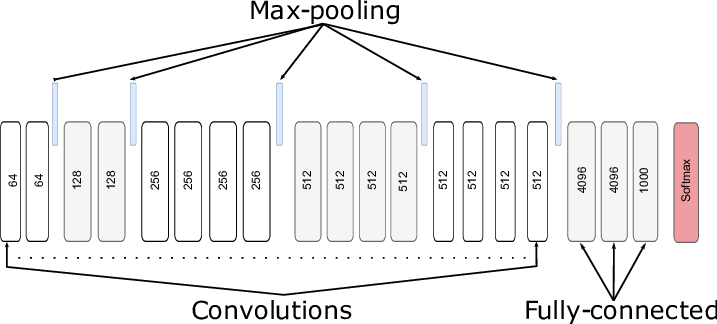 </div>

In [1]:
import torch
from torch import nn
from torchsummary import summary

In [2]:
class VGG_19(nn.Module):
    def __init__(self):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(256, 512, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(512, 512, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
        )

        self.classifier = nn.Sequential(
            nn.Linear(7*7*512, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 1000),
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [3]:
vgg_19 = VGG_19()
summary(vgg_19, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,